# Getting started

## Welcome to Ocelli!

*Ocelli (singular Ocellus, Latin: little eye) – simple eyes found in many insects in triplets. Their function is to navigate insects during the day or to detect movement.*

Ocelli is an open source Python library with computational tools for the visualization of multimodal single-cell developmental data. 
It includes tools for preprocessing, analysis and plotting of single-cell multi-omics. Thanks to being integrated with the universal standard AnnData data structure and using scanpy-like syntax, Ocelli can be easily added to your familiar single-cell analysis pipelines.

In this series of tutorials you are be presented a spectrum of Ocelli's possibilities and applications. Ocelli is designed for analyzing multimodal data, when each cell has entries from each modality. Firstly, we will work on simulated data for easier understanding how everything works. Next, we will proceed to single-cell multimodal data from human bone marrow and hair follicle - including modalities such as chromatin accessibility, gene expression, or proteomics. Lastly, we will share a new perspective on analysing unimodal transcriptomics data based on pancreatic endocrinogenesis and cell reprogrogramming data. Let's go!

## Learning Objectives

After this tutorial, you should be able to:
    
- Understand what multimodal data is;
- Understand the benefits of multimodal data visualizations over unimodal ones;
- Construct a Multimodal Diffusion Maps embedding of simulated data and visualize it using Ocelli.

Note: This tutorial is an introduction based on simulated data. Analysis of single-cell data is discussed in subsequent tutorials.

## Unimodal perspective

Before understanding the power of multimodality, you should consider inherent flows of unimodal data analyses. Modality refers to the way in which something happens - its context or origin. For example, when sequencing cells, you can analyze their transcriptome. However, a wide range of biological information is lost with this approach. A simplistic version of the *central dogma of molecular biology* states that *DNA makes RNA, and RNA makes protein*. As a result, when looking solely at RNA you omit molecular information hidden in DNA and protein. In this example, DNA, RNA and protein are seperate modalities, each contributiong information unavailable in remaining modalities. If your intention is to understand true molecular biological processes, you need to be able to interpret such multimodal signals together.

To build your intuition, we prepared simulated data, which is easy to interpret and visualize. Firstly, we will explore it unimodally.

Import Ocelli as

In [1]:
import ocelli as oci

We shorten the imported name to ``oci`` for better readability of code using Ocelli. Ocelli has three modules: ``oci.pp`` (data preprocessing), ``oci.tl`` (analysis tools), and ``oci.pl`` (plotting). The workflow typically consists of multiple function calls on an `anndata.AnnData` object.

Ocelli can produce static plots using [Matplotlib](https://matplotlib.org) and interactive plots using [Plotly](https://plotly.com/python/). ``oci.pl`` functions return Matplotlib Figure and Axes objects, or a Plotly Figure object that can be further customized. In presented tutorials we will show only static Matplotlib plots due to the incompatibility issues between interactive Plotly plots and the online documentation.

Set Matplotlib figure resolution of shown plots.

In [2]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 150

Some Ocelli functions include probabilistic steps. For result reproducibility, we set a random seed. If you omit this step, each run will result in marginally different outcomes, which is a natural outcome of stochastic processes.

In [3]:
SEED = 17

Now, load the data. 

In [4]:
import anndata

adata = anndata.read_h5ad('../../../data/binary-tree-dataset.h5ad')
adata

AnnData object with n_obs × n_vars = 6000 × 1
    obs: 'celltype', 'pseudotime'
    uns: 'modalities'
    obsm: 'modality0', 'modality1', 'modality2'

Ocelli uses an annotated data structure called [AnnData](https://anndata.readthedocs.io). If you're unnfamiliar with it, we recommend glancing at its linked documentation.

Here, we load a h5ad file storing an AnnData object with three modalities in ``adata.obsm`` saved under keys ``modality0``, ``modality1``, and ``modality2``. Each modality is an array with rows corresponding to observations and columns to variables/features. Note that *i*-th rows in all modalities correspond to the same observation.

In this particular dataset, modalities are 3-dimensional for quick intuitive visualizations, that would be impossible for high-dimensional single-cell data.

In [5]:
adata.obsm['modality0'].shape, adata.obsm['modality1'].shape, adata.obsm['modality2'].shape

((6000, 3), (6000, 3), (6000, 3))

``adata.uns`` stores ``modalities``, which defines for Ocelli which arrays in ``adata.obsm`` are modalities.

In [6]:
adata.uns['modalities']

array(['modality0', 'modality1', 'modality2'], dtype=object)

``adata.obs`` is a dataframe with metadata for observations. ``adata.var``, analogically, stores metadata for variable features (however, for this dataset we do not need it). Here, observations' metadata consists of celltypes and pseudotime. As you see, there are 6000 observations.

In [7]:
adata.obs

,celltype,pseudotime
0,A,0
1,A,1
2,A,2
3,A,3
4,A,4
...,...,...
5995,F,2995
5996,F,2996
5997,F,2997
5998,F,2998


Now, explore each of 3D modalities by plotting their 2D projections. Observations aree colored according to ``celltype`` column from ``adata.obs``.

(<Figure size 960x720 with 1 Axes>, <AxesSubplot:>)

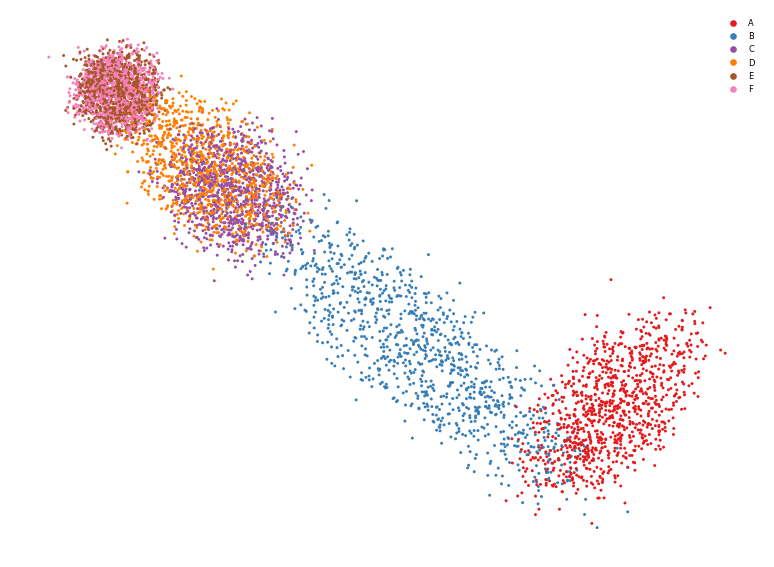

In [8]:
oci.tl.project_2d(adata, x3d_key='modality0', output_key='modality0_proj', alpha=30, beta=0)
oci.pl.scatter(adata, x_key='modality0_proj', color_key='celltype', marker_size=2, cmap='Set1')

Observations are additionally ordered according to a ``pseudotime``. The developmental process begins at the intersection of A and B types and proceeds further. Notice that only types A and B are well-defined in this modality. Types C, D and E, F are mixed up between each other. When looking only at ``modality0``, it is impossible to understand a structure of the underlying developmental process beyond A/B observations.

(<Figure size 960x720 with 2 Axes>, <AxesSubplot:>)

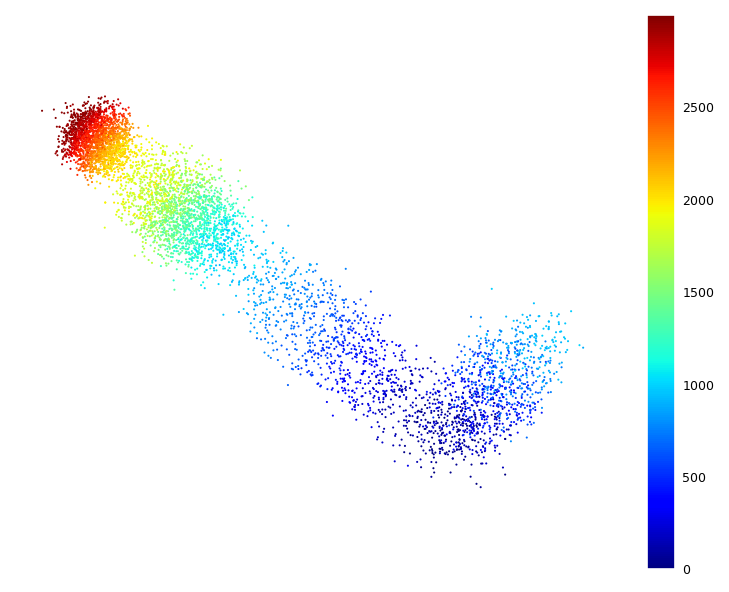

In [9]:
oci.pl.scatter(adata, x_key='modality0_proj', color_key='pseudotime', marker_size=1, cmap='jet')

The power of multimodal data is lies in the fact that what is invisible in a modality, may be found in another. ``modality1`` allows to uncover what happens in observations of type C and D.

(<Figure size 960x720 with 1 Axes>, <AxesSubplot:>)

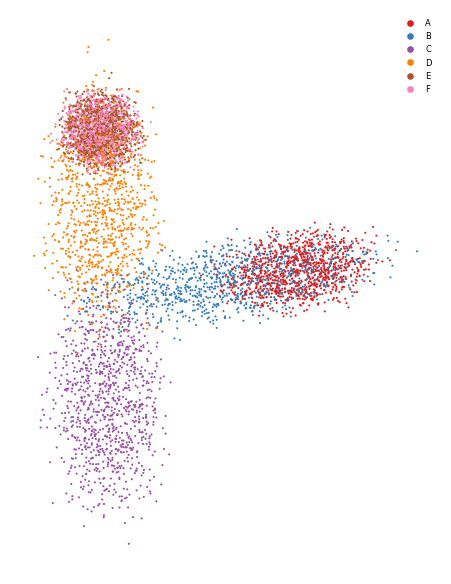

In [10]:
oci.tl.project_2d(adata, x3d_key='modality1', output_key='modality1_proj', alpha=--60, beta=60)
oci.pl.scatter(adata, x_key='modality1_proj', color_key='celltype', marker_size=1, cmap='Set1')

(<Figure size 960x720 with 2 Axes>, <AxesSubplot:>)

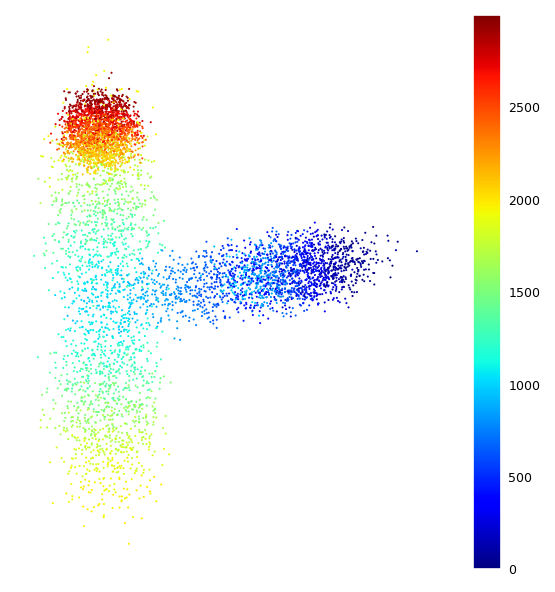

In [11]:
oci.pl.scatter(adata, x_key='modality1_proj', color_key='pseudotime', marker_size=1, cmap='jet')

Similarily, ``modality2`` reveals that observations E and F are actually seperate lineages, which is unclear when looking solely at ``modality0`` and ``modality1``.

(<Figure size 960x720 with 1 Axes>, <AxesSubplot:>)

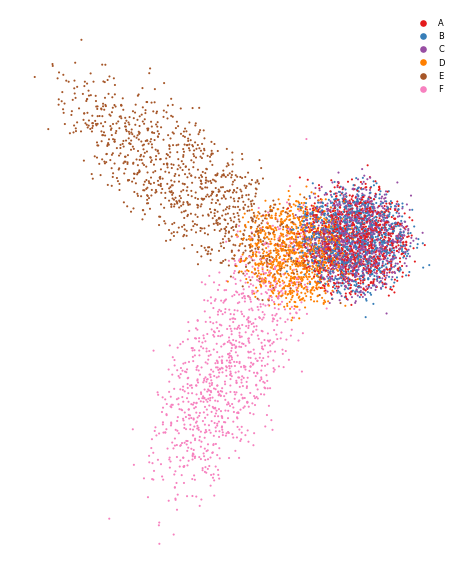

In [12]:
oci.tl.project_2d(adata, x3d_key='modality2', output_key='modality2_proj', alpha=30, beta=30)
oci.pl.scatter(adata, x_key='modality2_proj', color_key='celltype', marker_size=1, cmap='Set1')

(<Figure size 960x720 with 2 Axes>, <AxesSubplot:>)

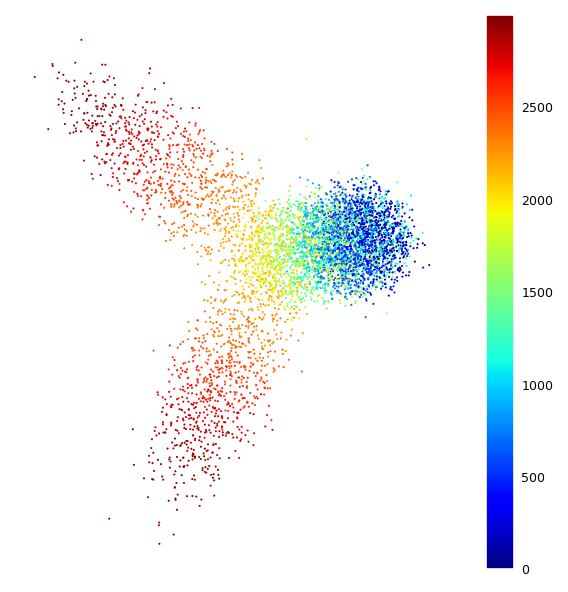

In [13]:
oci.pl.scatter(adata, x_key='modality2_proj', color_key='pseudotime', marker_size=1, cmap='jet')

## Multimodal perspective

All above plots are unimodal - they don't capture the whole extent of available information. Ocelli provides tools for embedding all modalities into a single, multimodal latent space using Multimodal Diffusion Maps algorithm. This process can be split into three stages:
- nearest neighbors search,
- calculation of multimodal weights,
- calculation of Multimodal Diffusion Maps embedding.

In [14]:
oci.pp.neighbors(adata, n_neighbors=20, verbose=True)
oci.tl.weights(adata, random_state=SEED, verbose=True)
oci.tl.MDM(adata, n_components=10, unimodal_norm=False, verbose=True, random_state=SEED)

[modality0] 20 nearest neighbors calculated.
[modality1] 20 nearest neighbors calculated.
[modality2] 20 nearest neighbors calculated.


2022-10-10 00:49:32,534	INFO worker.py:1518 -- Started a local Ray instance.


Multimodal cell-specific weights estimated.


2022-10-10 00:49:41,475	INFO worker.py:1518 -- Started a local Ray instance.


[modality0] Unimodal Markov chain calculated
[modality1] Unimodal Markov chain calculated
[modality2] Unimodal Markov chain calculated
Multimodal Markov chain calculated
Eigendecomposition finished.
10 Multimodal Diffusion Maps components calculated.


The resulting 10-dimensional embedding represents a multimodal process from which the modelled developmental process originates. The embedding is saved to ``adata.obsm`` as ``X_mdm``. Below, we visualize it using ForceAtlas2, a force-directed layout algorithm for graph visualization. This is done in three steps:
- nearest neighbors search in MDM latent space,
- calculation of nearest neighbor graph,
- graph visualization.

[X_mdm] 30 nearest neighbors calculated.
[X_mdm] Nearest neighbors-based graph constructed.


Oct 10, 2022 12:50:01 AM org.netbeans.modules.masterfs.watcher.Watcher getNotifierForPlatform
INFO: Native file watcher is disabled
Oct 10, 2022 12:50:06 AM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Nodes loaded: 6,000 (6,000 added)
Oct 10, 2022 12:50:06 AM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Edges loaded: 180,000 (108,678 added)


*******

******************25%
*************************50%
*************************75%
*************************100%
Time = 180.485s


(<Figure size 960x720 with 1 Axes>, <AxesSubplot:>)

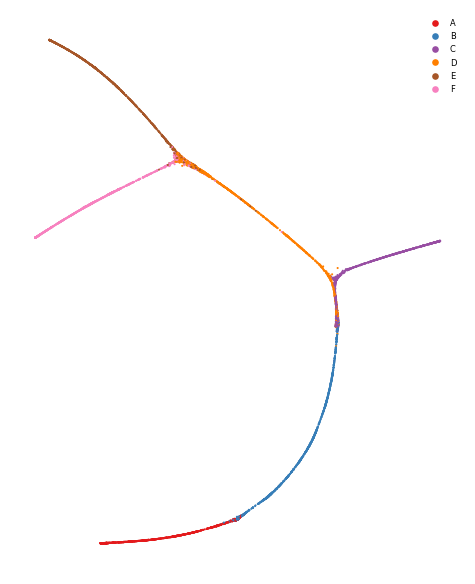

In [15]:
oci.pp.neighbors(adata, modalities=['X_mdm'], n_neighbors=30, verbose=True)
oci.tl.neighbors_graph(adata, n_edges=30, neighbors_key='X_mdm', verbose=True)
oci.tl.FA2(adata, n_components=2, n_iter=5000, random_state=SEED, output_key='X_fa2')

oci.pl.scatter(adata, x_key='X_fa2', color_key='celltype', cmap='Set1', marker_size=1)

Thanks to Multimodal Diffusion Maps, all observation types A-F are clearly distinguished. Now, it is easy to trace all multimodal developmental lineages, which were impossible to spot simultaneously in unimodal exploration.

Alternatively, you can use UMAP or any other dimension reduction algorithm to visualize MDM embedding. Ocelli has built-in wrappers for ForceAtlas2 and UMAP.

(<Figure size 960x720 with 1 Axes>, <AxesSubplot:>)

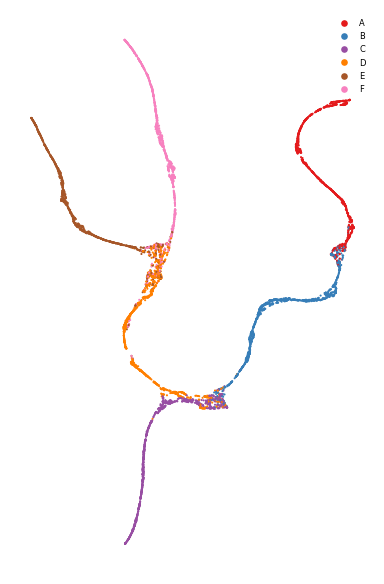

In [16]:
oci.tl.UMAP(adata, n_components=2, n_neighbors=30, random_state=SEED, obsm_key='X_mdm', output_key='X_umap')

oci.pl.scatter(adata, x_key='X_umap', color_key='celltype', cmap='Set1', marker_size=1)

Ocelli provides an explainable insight into what the algorithm is learning - multimodal weights. For each cell, weights form a distribution over modalities (cell's weights sum to 1). A higher weight indicates that algorithm thinks a modality is more informative about an observation and its neighborhood then others.

You can examine weight distributions with respect to each observation type.

(<Figure size 960x720 with 18 Axes>,
 array([[<AxesSubplot:title={'center':'A'}, ylabel='modality0'>,
         <AxesSubplot:title={'center':'B'}>,
         <AxesSubplot:title={'center':'C'}>,
         <AxesSubplot:title={'center':'D'}>,
         <AxesSubplot:title={'center':'E'}>,
         <AxesSubplot:title={'center':'F'}>],
        [<AxesSubplot:ylabel='modality1'>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='modality2'>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

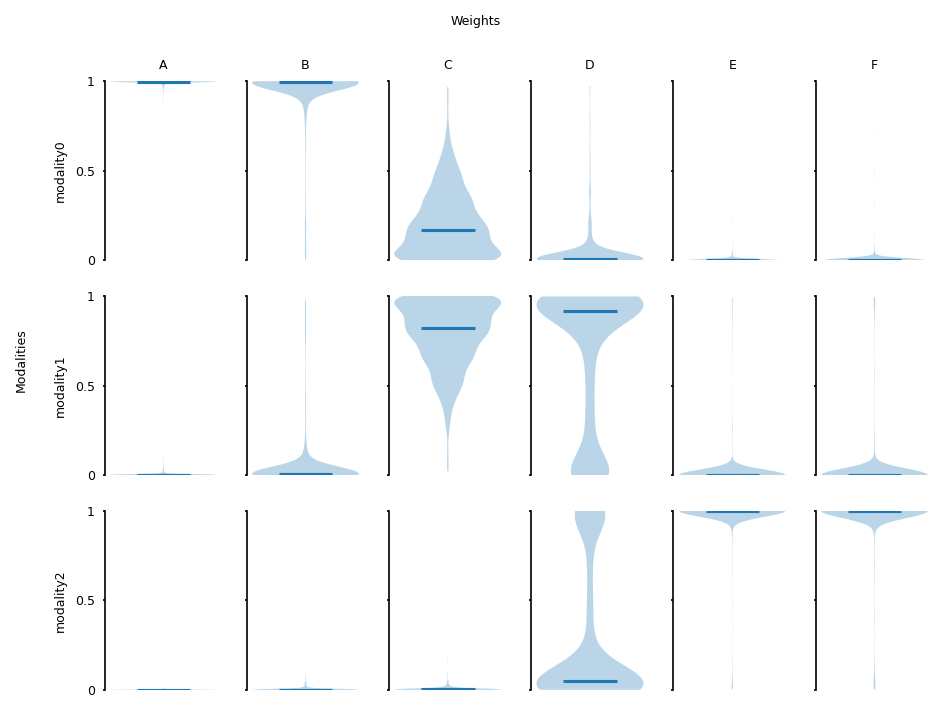

In [17]:
oci.pl.weights(adata, grouping_key='celltype')

And see each modality's weights on scatter plots.

In [18]:
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', ['#EAEAEA', '#EAEAEA', '#EFB0B0', '#FF0000', '#FF0000'], N=256)

(<Figure size 960x720 with 2 Axes>, <AxesSubplot:>)

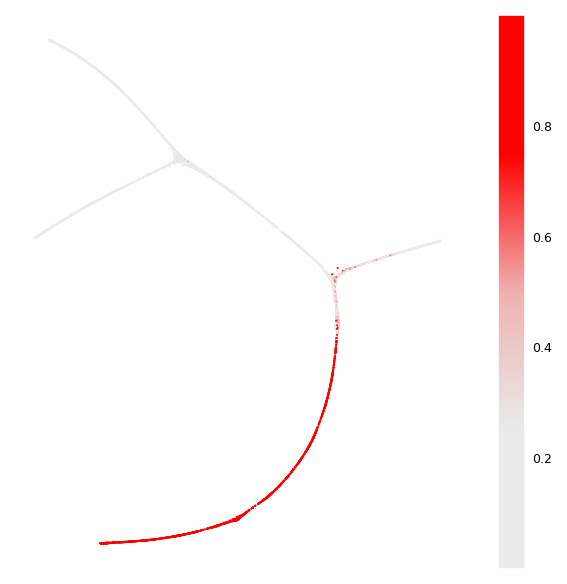

In [19]:
adata.obs['w_m0'] = list(adata.obsm['weights']['modality0'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m0', cmap=cmap, marker_size=1)

(<Figure size 960x720 with 2 Axes>, <AxesSubplot:>)

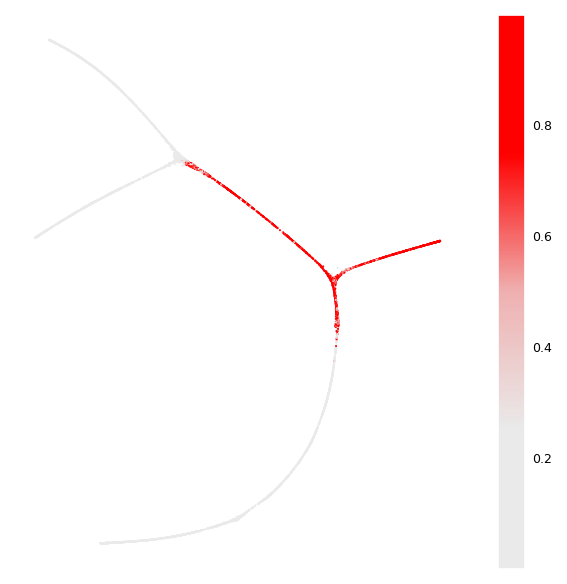

In [20]:
adata.obs['w_m1'] = list(adata.obsm['weights']['modality1'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m1', cmap=cmap, marker_size=1)

(<Figure size 960x720 with 2 Axes>, <AxesSubplot:>)

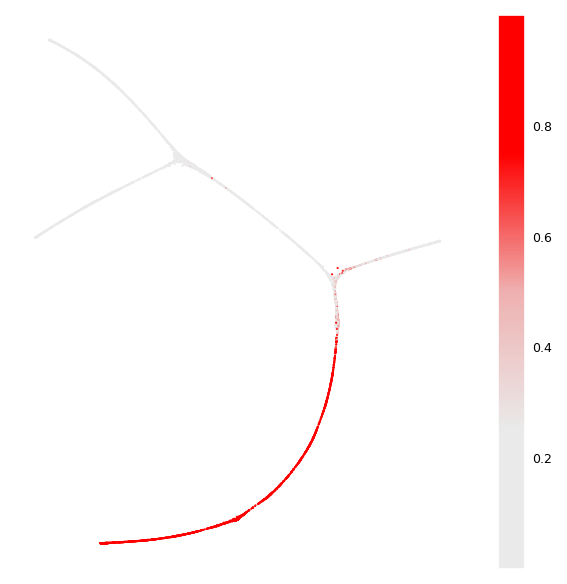

In [21]:
adata.obs['w_m0'] = list(adata.obsm['weights']['modality0'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m0', cmap=cmap, marker_size=1)

It is interesting to see what happens when available information is limited only to two out of three modalities, e.g., only ``modality0`` and ``modality1``.

2022-10-10 00:53:57,495	INFO worker.py:1518 -- Started a local Ray instance.


Multimodal cell-specific weights estimated.


2022-10-10 00:54:07,427	INFO worker.py:1518 -- Started a local Ray instance.


[modality0] Unimodal Markov chain calculated
[modality1] Unimodal Markov chain calculated
Multimodal Markov chain calculated
Eigendecomposition finished.
10 Multimodal Diffusion Maps components calculated.
[X_mdm] 30 nearest neighbors calculated.
[X_mdm] Nearest neighbors-based graph constructed.


Oct 10, 2022 12:54:35 AM org.netbeans.modules.masterfs.watcher.Watcher getNotifierForPlatform
INFO: Native file watcher is disabled
Oct 10, 2022 12:54:37 AM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Nodes loaded: 6,000 (6,000 added)
Oct 10, 2022 12:54:37 AM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Edges loaded: 180,000 (107,431 added)


***********************

**25%
*************************50%
*************************75%
*************************100%
Time = 134.224s


(<Figure size 960x720 with 1 Axes>, <AxesSubplot:>)

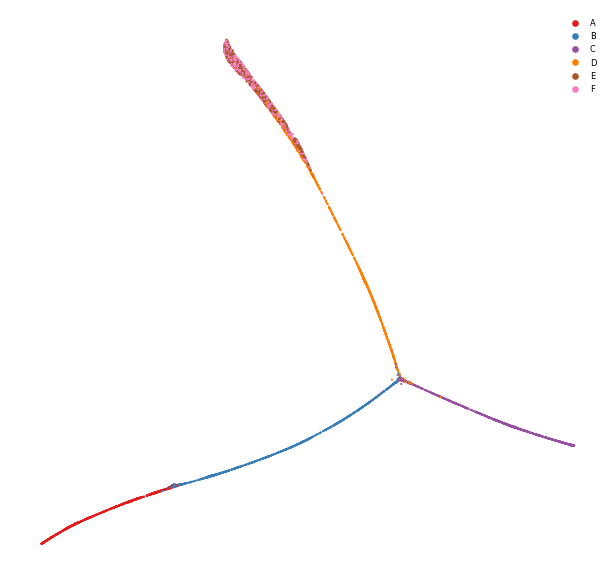

In [22]:
adata.uns['modalities'] = ['modality0', 'modality1']
oci.tl.weights(adata, random_state=SEED, verbose=True)
oci.tl.MDM(adata, n_components=10, unimodal_norm=False, verbose=True, random_state=SEED)
oci.pp.neighbors(adata, modalities=['X_mdm'], n_neighbors=30, verbose=True)
oci.tl.neighbors_graph(adata, n_edges=30, neighbors_key='X_mdm', verbose=True)
oci.tl.FA2(adata, n_components=2, n_iter=5000, random_state=SEED, output_key='X_fa2')
oci.pl.scatter(adata, x_key='X_fa2', color_key='celltype', cmap='Set1', marker_size=1)

As expected, observations E and F from unused ``modality2`` are mixed, while all others are well-reconstructed.

(<Figure size 960x720 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'A'}, ylabel='modality0'>,
         <AxesSubplot:title={'center':'B'}>,
         <AxesSubplot:title={'center':'C'}>,
         <AxesSubplot:title={'center':'D'}>,
         <AxesSubplot:title={'center':'E'}>,
         <AxesSubplot:title={'center':'F'}>],
        [<AxesSubplot:ylabel='modality1'>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

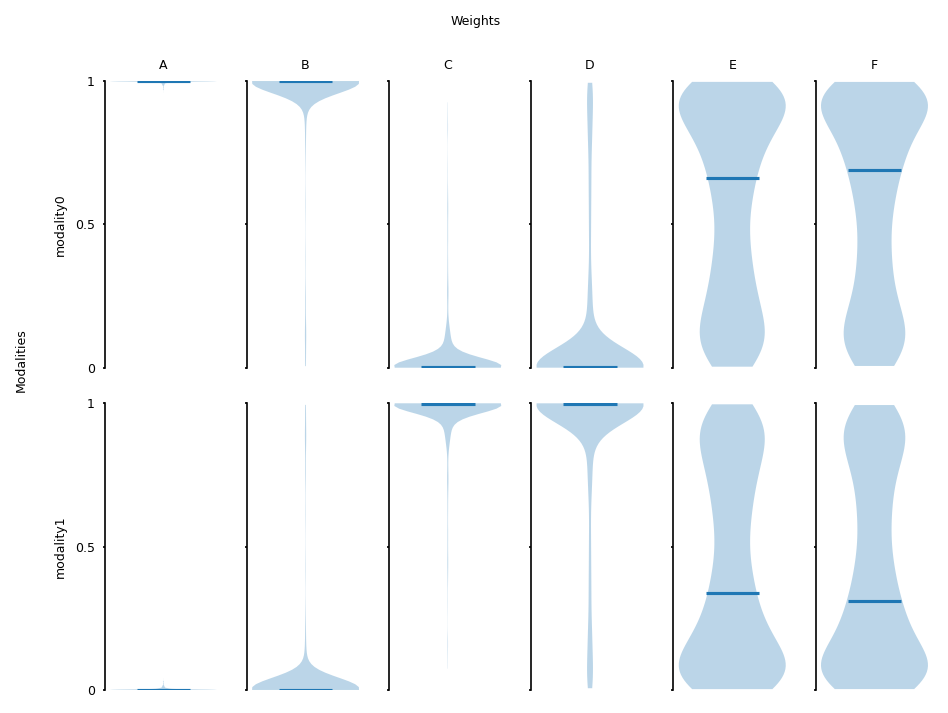

In [23]:
oci.pl.weights(adata, grouping_key='celltype')

(<Figure size 960x720 with 2 Axes>, <AxesSubplot:>)

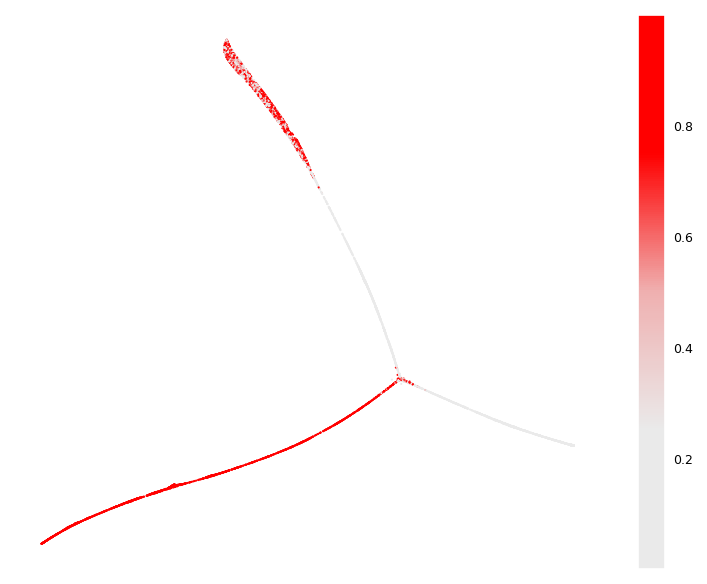

In [24]:
adata.obs['w_m0'] = list(adata.obsm['weights']['modality0'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m0', cmap=cmap, marker_size=1)

(<Figure size 960x720 with 2 Axes>, <AxesSubplot:>)

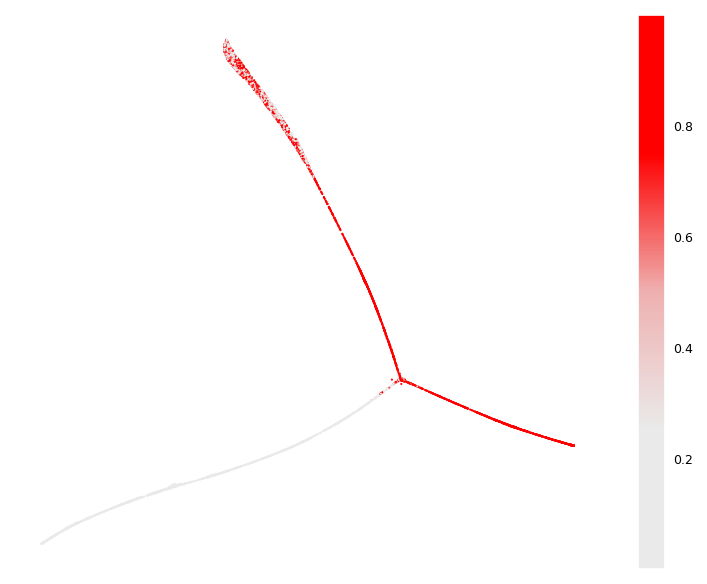

In [25]:
adata.obs['w_m1'] = list(adata.obsm['weights']['modality1'])
oci.pl.scatter(adata, x_key='X_fa2', color_key='w_m1', cmap=cmap, marker_size=1)

## Another example